# **Detecting Management Fraud**
In the wake of the Enron scandal two public accounting firms, Oscar Anderson (OA) and Trice-Milkhouse-Loopers (TML), merged (forming OATML) and are reviewing their methods for detecting management fraud during audits. The two firms had each developed their own set of questions that auditors could use in assessing management fraud.
To avoid a repeat of the problems faced by Enron’s auditors, OATML wants to develop an automated decision tool to assist auditors in predicting whether or not their clients are engaged in fraudulent management practices. This tool would basically ask an auditor all the OA or TML fraud detection questions and then automatically renders a decision about whether or not the client company is engaging in fraudulent activities. The decision problem OATML faces is twofold: (1) Which of the two sets of fraud detection questions are best at detecting fraud? and, (2) What is the best way to translate the answers to these questions into a prediction or classification about management fraud?
To assist in answering these questions, the company has compiled an Excel spreadsheet that contains both the OA and TML fraud detection questions and answers to both sets of questions based on 382 audits previously conducted by the two companies (see sheets OA and TML, respectively). (Note: For all data 15yes, 05no.) For each audit, the last variable in the spreadsheet indicates whether or not the respective companies were engaged in fraudulent activities (i.e., 77 audits uncovered fraudulent activities, 305 did not).
You have been asked to perform the following analysis and provide a recommendation as to what combination of fraud questions OATML should adopt.  

**a.For the OA fraud questions, create a correlation matrix for all the variables. Do any of the correlations pose a concern?**  

**b. Using the 8 questions that correlate most strongly with the dependent fraud variable, partition the OA data to create a training and validation data sets with a 50% success rate in the training data.**  

**c. Use Discriminant analysis, decision tree, and neural network techniques to create classifiers for the partitioned OA data set. Summarize the classification accuracy of each technique on the training and validation sets. Interpret these results and indicate which technique you would recommend OATML use.**  

# **Answer a)**

First we will import the required libraries

In [1]:
import pandas as pd
import warnings
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.utils import resample
warnings.filterwarnings("ignore")
%matplotlib inline

Loading the dataset

In [2]:
df = pd.read_excel("Datasets/Fraud.xlsm", sheet_name="OA")
print(df.head())

   Audit  Q1  Q2  Q3  Q4  Q5  Q6  Q7  Q8  Q9  ...  Q16  Q17  Q18  Q19  Q20   
0      1   1   0   0   0   0   0   0   0   0  ...    0    0    0    0    0  \
1      2   1   0   0   0   0   0   0   0   0  ...    0    0    0    0    0   
2      3   1   1   0   0   0   0   1   0   0  ...    1    0    0    0    0   
3      4   1   0   0   0   0   0   0   0   0  ...    0    0    0    1    0   
4      5   1   1   0   0   0   0   0   0   0  ...    1    0    0    1    0   

   Q21  Q22  Q23  Q24  FRAUD  
0    0    0    0    1      1  
1    0    1    0    0      1  
2    0    1    0    0      1  
3    0    1    0    0      1  
4    0    0    1    0      1  

[5 rows x 26 columns]


Then we will plot the correlation matrix

<Axes: >

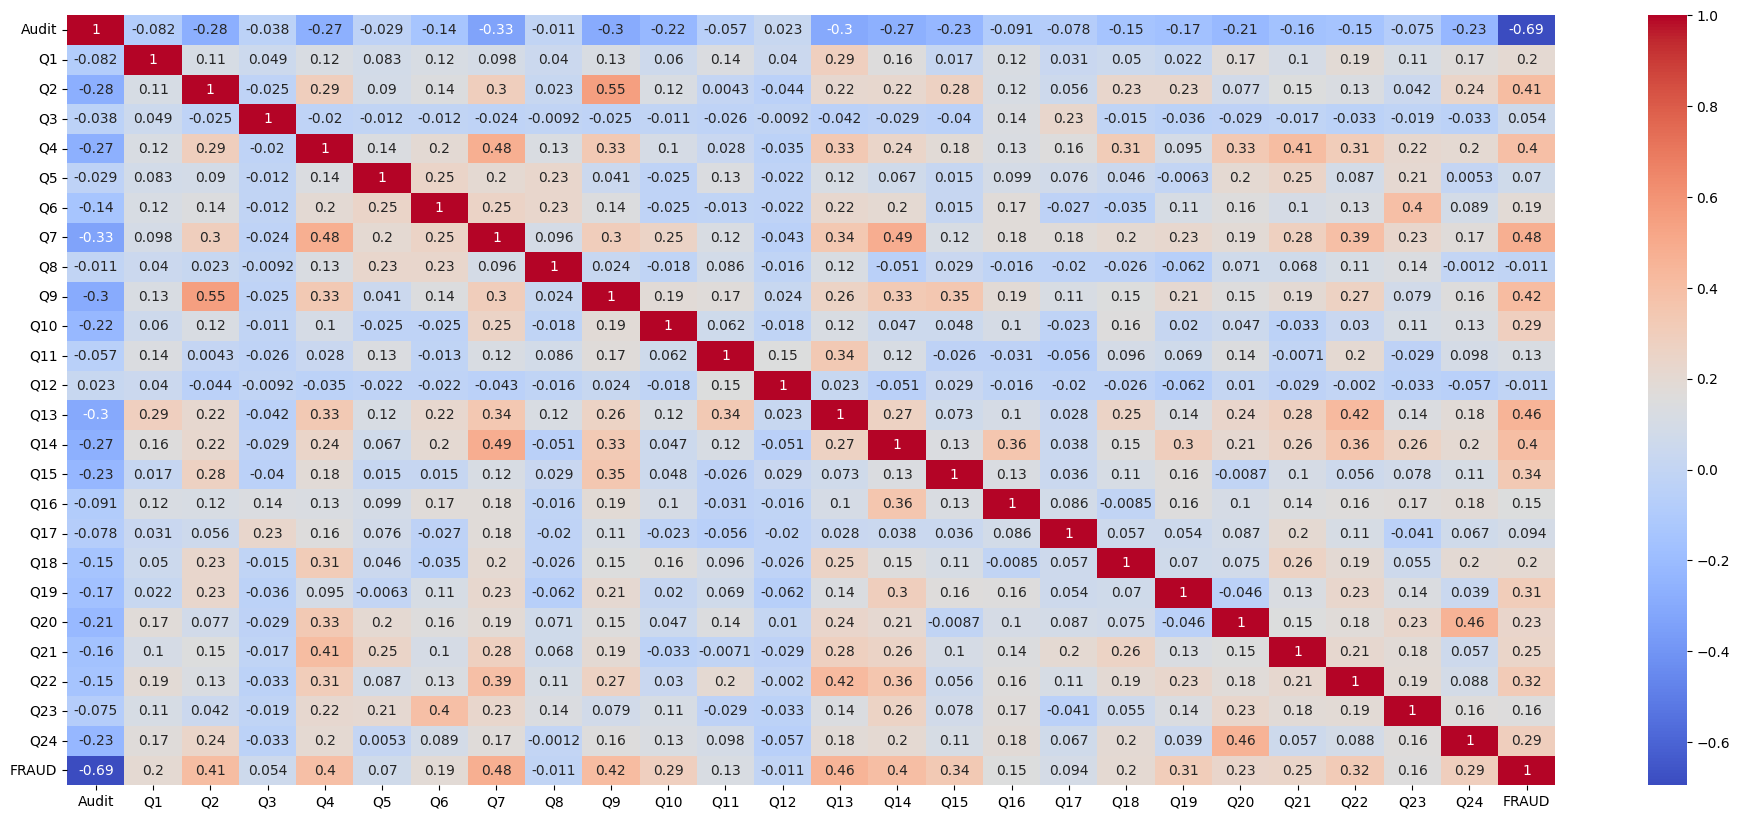

In [3]:
# Correlation Matrix
correlation_matrix = df.corr()
plt.figure(figsize=(24,10))
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm')

Now we will check for correlations that pose a concern

<Axes: >

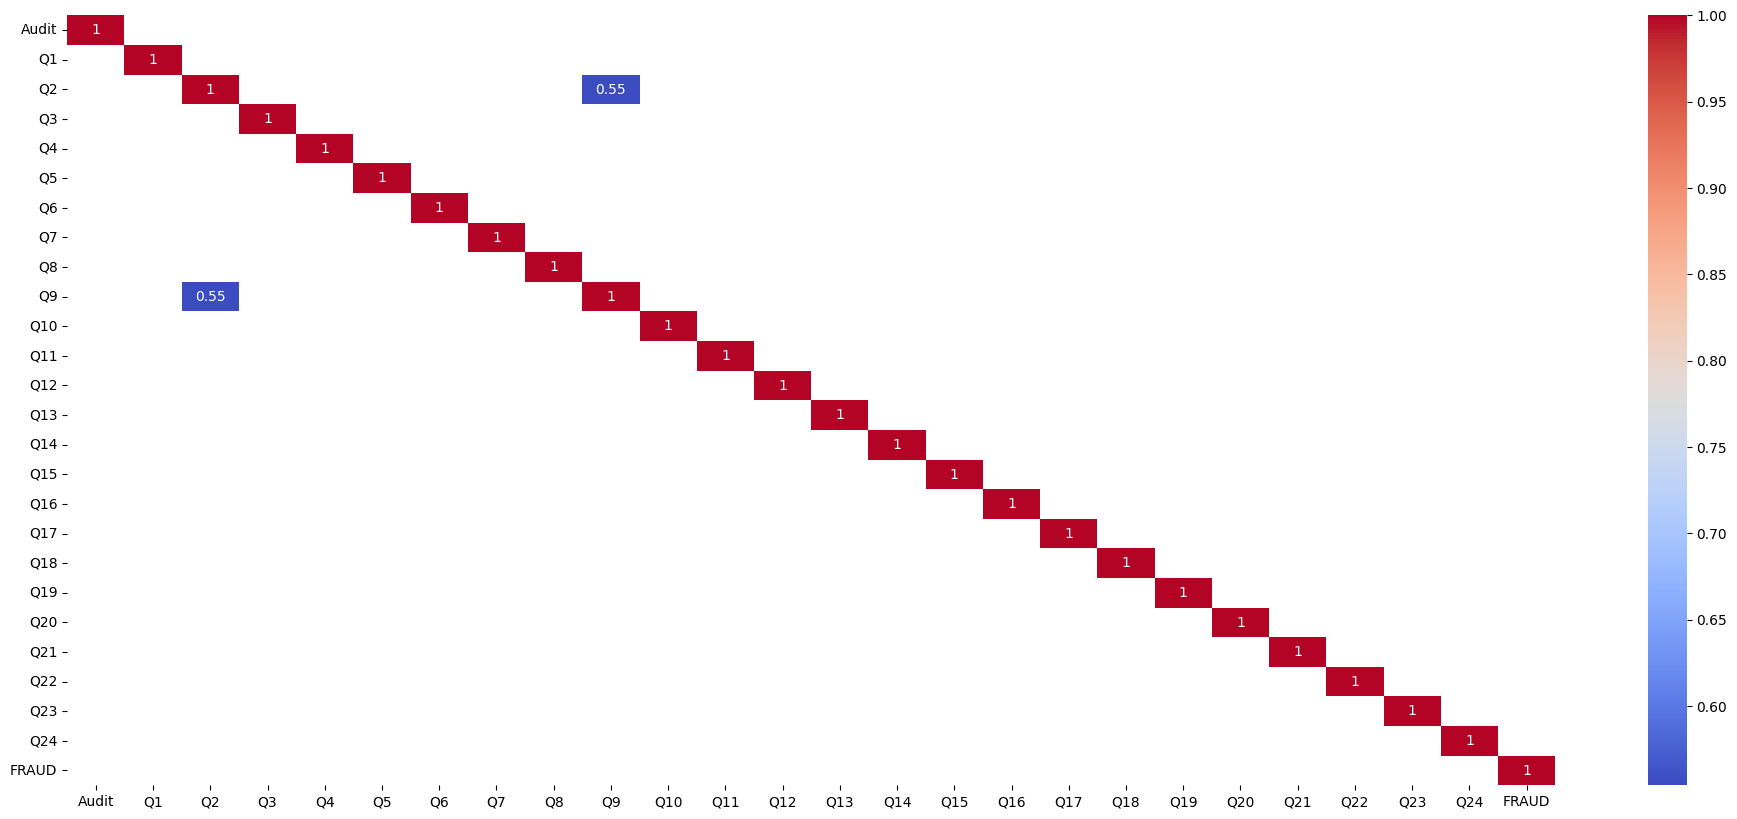

In [4]:
# Check for concerning correlations against a threshold
threshold = 0.5
concerning_correlations = correlation_matrix[correlation_matrix > threshold]
plt.figure(figsize=(24,10))
sns.heatmap(data=concerning_correlations, annot=True, cmap='coolwarm')

**We find that Q2 and Q9 are concerning correlations**

# **Answer b)**

First we will try to find the 8 questions that correlate most strongly with the dependent fraud variable

In [5]:
# Using nlargest to get the top correlated variables and then excluding the dependent fraud variable
correlated_vars = correlation_matrix['FRAUD'].nlargest(9).index[1:]
print(correlated_vars)

Index(['Q7', 'Q13', 'Q9', 'Q2', 'Q14', 'Q4', 'Q15', 'Q22'], dtype='object')


Now we will partition the data to create a training and validation data sets with a 50% success rate in the training data.

In [6]:
# Separating fraud and non-fraud cases
fraud_cases = df[df['FRAUD'] == 1]
non_fraud_cases = df[df['FRAUD'] == 0]

# Resampling the majority class (non-fraud) to match the minority class (fraud)
non_fraud_resampled = resample(non_fraud_cases, replace=False, n_samples=len(fraud_cases), random_state=42)

# Combining the resampled datasets
balanced_data = pd.concat([fraud_cases, non_fraud_resampled])

# Creating the feature matrix and target vector
X = balanced_data[correlated_vars]
y = balanced_data['FRAUD']

# Splitting the data into training and validation sets with stratified sampling
split = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=42)
for train_index, val_index in split.split(X, y):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

print("Training Data:")
print("Success Rate:", y_train.mean())

Training Data:
Success Rate: 0.5064935064935064


# **Answer c)**

Now we will find Discriminant analysis, decision tree, and neural network techniques to create classifiers for the partitioned OA data set

# **LDA**

In [7]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [8]:
# Predicting on training and validation sets
lda_train_pred = lda.predict(X_train)
lda_val_pred = lda.predict(X_val)

# Calculating classification accuracy
lda_train_acc = (lda_train_pred == y_train).mean()
lda_val_acc = (lda_val_pred == y_val).mean()
print("Training Accuracy: ", lda_train_acc)
print("Validation Accuracy: ", lda_val_acc)

Training Accuracy:  0.8961038961038961
Validation Accuracy:  0.7402597402597403


# **Decision Tree**

In [9]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [10]:
# Predicting on training and validation sets
dt_train_pred = dt.predict(X_train)
dt_val_pred = dt.predict(X_val)

# Calculating classification accuracy
dt_train_acc = (dt_train_pred == y_train).mean()
dt_val_acc = (dt_val_pred == y_val).mean()
print("Training Accuracy: ", dt_train_acc)
print("Validation Accuracy: ", dt_val_acc)

Training Accuracy:  0.922077922077922
Validation Accuracy:  0.7532467532467533


# **Neural Network**

In [11]:
# normalize the data
scaleInput = MinMaxScaler()
X_scaled = scaleInput.fit_transform(X)

In [12]:
# Splitting the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.5, random_state=42)

For neural network we will be using MLP Classifier

In [13]:
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

MLPClassifier(random_state=42)

In [14]:
# Predicting on training and validation sets
mlp_train_pred = mlp.predict(X_train)
mlp_val_pred = mlp.predict(X_val)

# Calculating classification accuracy
mlp_train_acc = (mlp_train_pred == y_train).mean()
mlp_val_acc = (mlp_val_pred == y_val).mean()
print("Training Accuracy: ", mlp_train_acc)
print("Validation Accuracy: ", mlp_val_acc)

Training Accuracy:  0.8831168831168831
Validation Accuracy:  0.8441558441558441


Based on the superior validation accuracy of 84.41%, it is recommended that OATML should use the Neural Network (MLP Classifier) technique to forecast management fraud based on the OA fraud inquiries. The high validation accuracy indicates that the neural network model has effectively learned the underlying patterns and can generalize well to new, unseen instances.